In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_excel('raw data.xlsx')
data.head()

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
0,-0.000304,0.008699,-0.000419,0.008568,-0.000266,0.008532,-0.000247,0.013281,-0.000285,0.013257,...,-0.000476,0.036438,-0.000495,0.036350,0.047982,0.078172,-0.000438,0.037990,-0.000457,0.037948
1,0.000320,0.008756,0.000264,0.008663,0.000307,0.008676,0.000263,0.013381,0.000267,0.013432,...,0.001213,0.037585,0.001211,0.037570,0.050175,0.079991,0.001774,0.039683,0.001754,0.039658
2,0.001275,0.008937,0.001265,0.008843,0.001303,0.008856,0.001258,0.013623,0.001283,0.013666,...,0.004240,0.039765,0.004214,0.039764,0.054163,0.083381,0.035768,0.067949,0.035768,0.067889
3,0.002309,0.009120,0.002282,0.009026,0.002267,0.009040,0.002277,0.013871,0.002288,0.013919,...,0.007216,0.041989,0.007205,0.041972,0.058138,0.086640,0.069793,0.096250,0.069744,0.096142
4,0.003321,0.009296,0.003268,0.009203,0.003306,0.009215,0.003250,0.014109,0.003279,0.014148,...,0.010192,0.044260,0.010182,0.044205,0.062176,0.089898,0.073796,0.099329,0.073763,0.099260


In [2]:
data.iloc[:,0].head()

0   -0.000304
1    0.000320
2    0.001275
3    0.002309
4    0.003321
Name: 1, dtype: float64

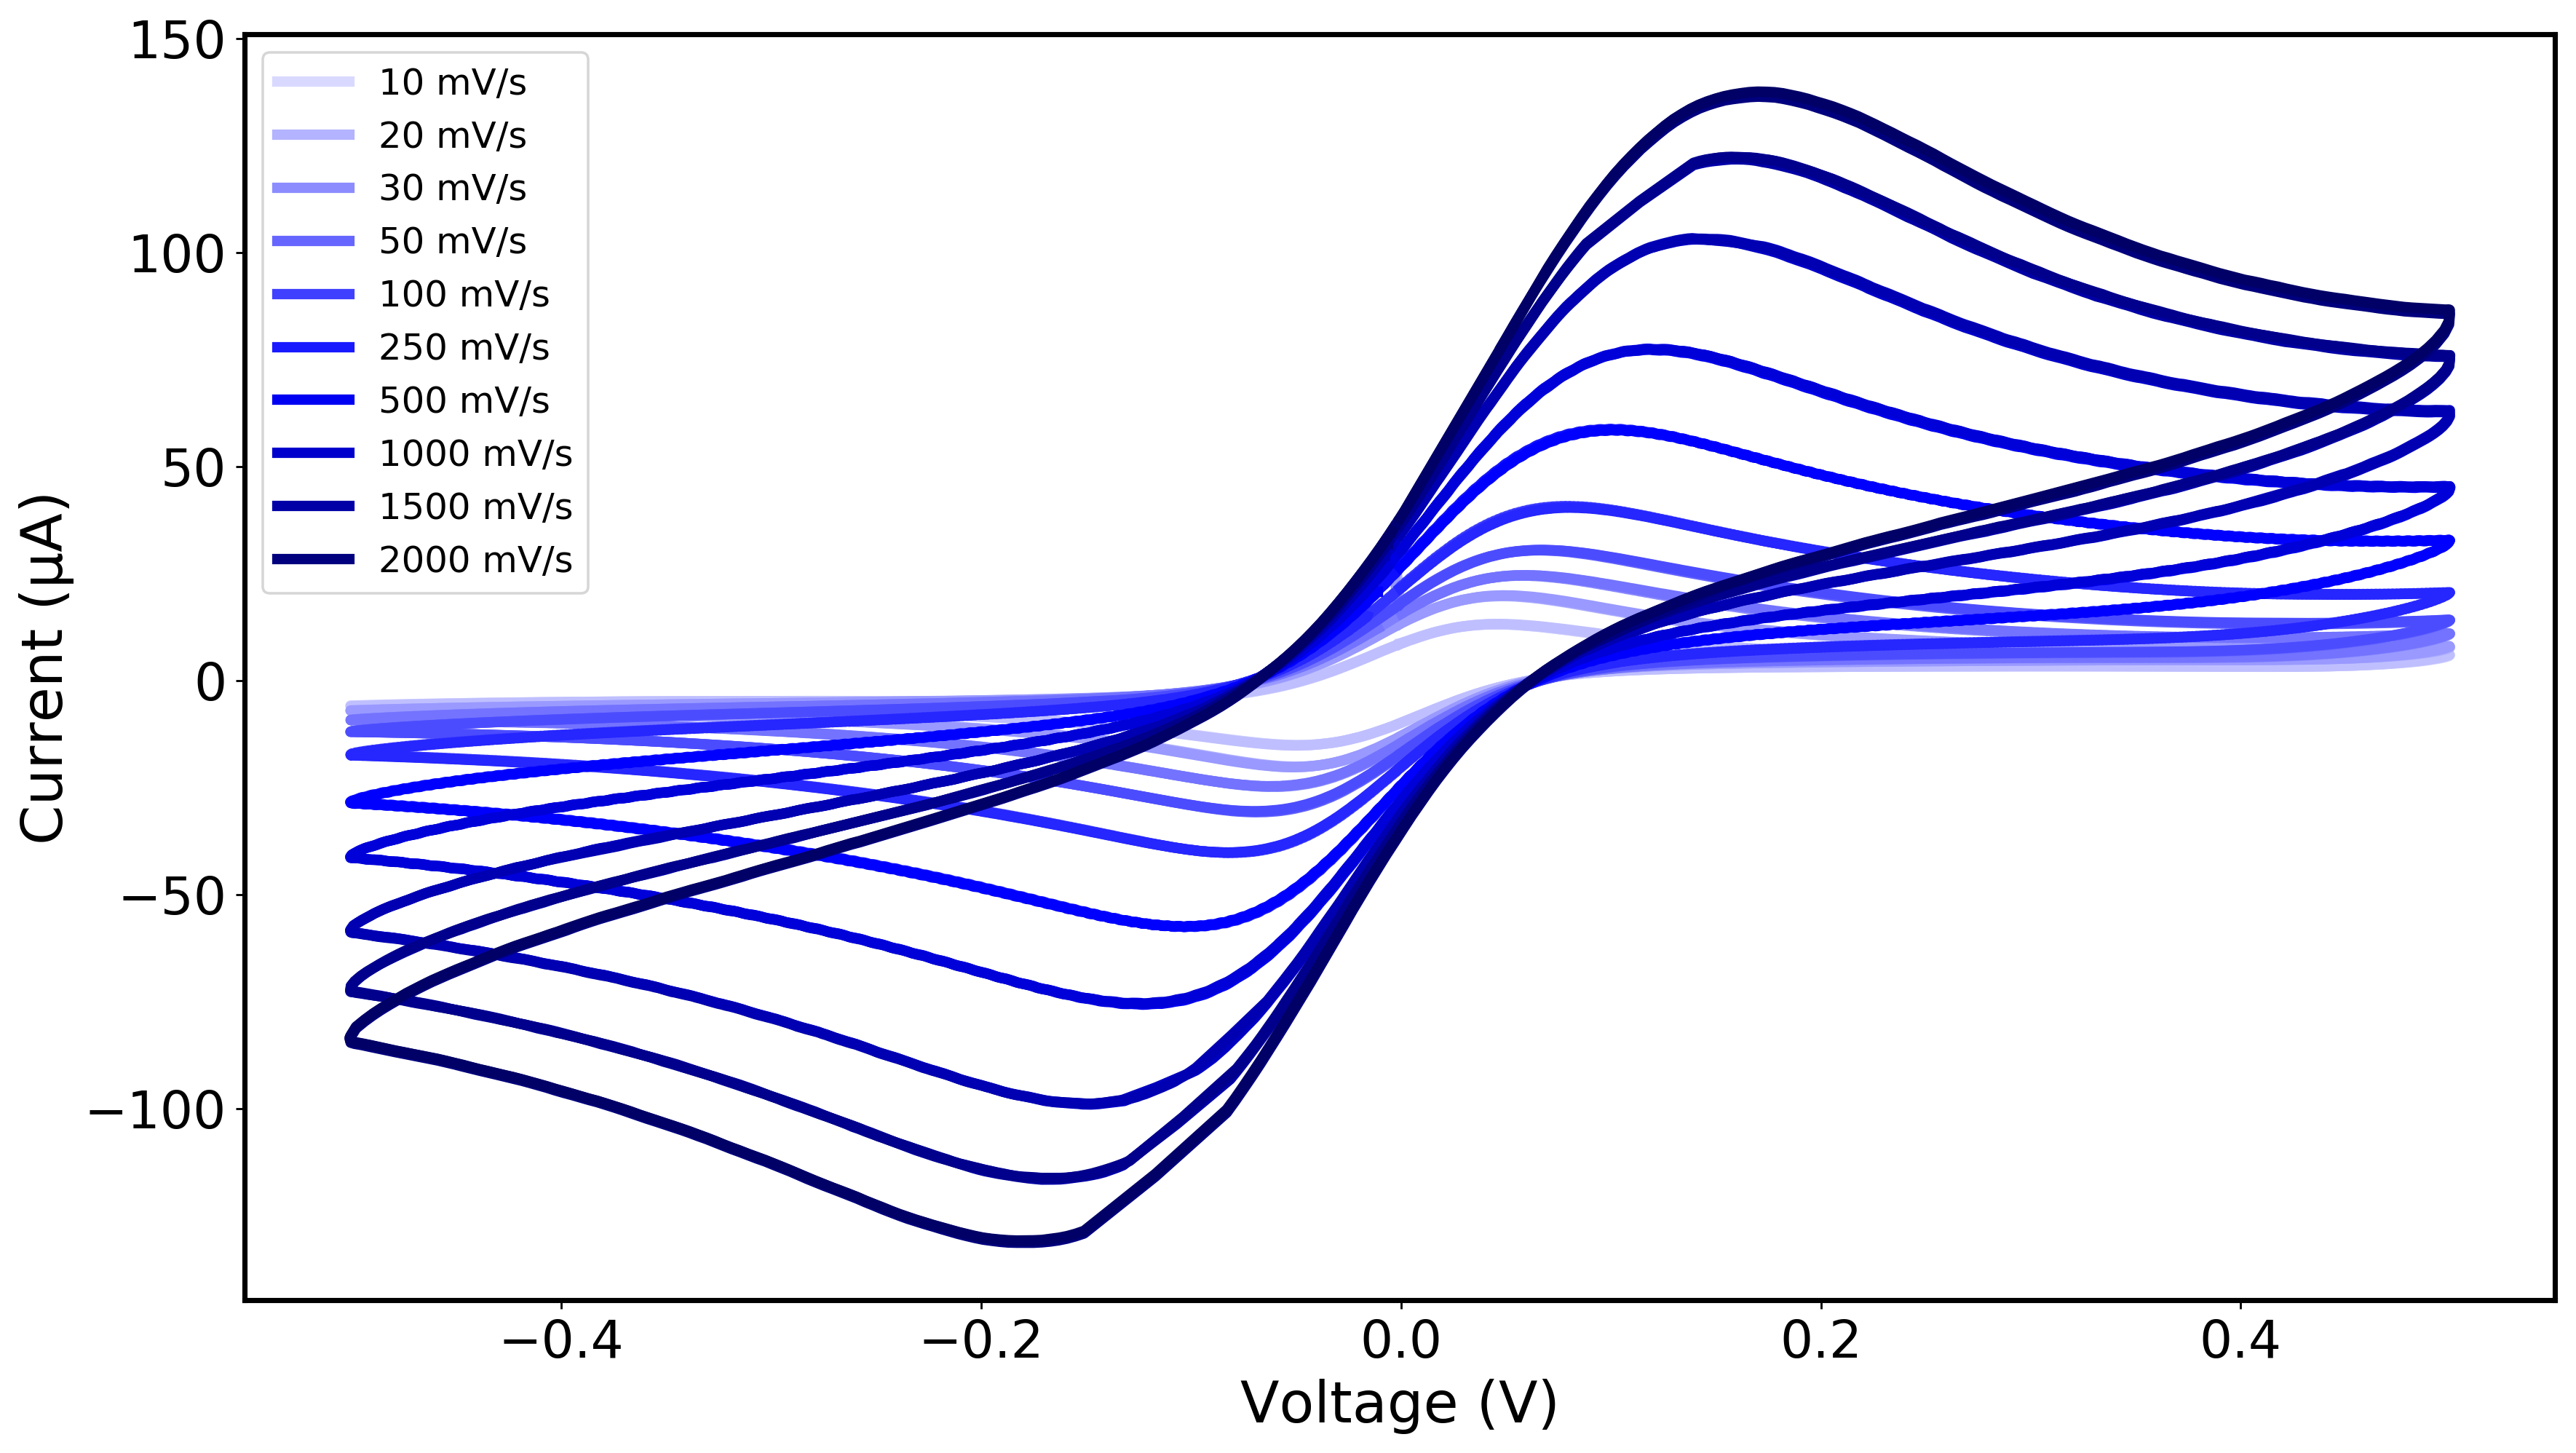

In [24]:
def lighten_color(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

fig, ax = plt.subplots(figsize=(16,9), dpi=256)
scan_rate = [1, 5, 10, 25, 50, 100]
c = 0.1

for i in range(0,11,2):
    c +=0.05
    if i%2 == 0:
        ax.plot(np.array(data.iloc[:, i]),
                np.array(data.iloc[:, i+1])*1000,
                linewidth = 4,
                color=lighten_color('blue', c),
                label = f'{scan_rate[int(i/6)]} mV/s')
#        print('+++',data.columns[i])
    else:
        ax.plot(np.array(data.iloc[:, i]),
                np.array(data.iloc[:, i+1])*1000,
                color=lighten_color('blue', c),
                linewidth = 4)
#        print('---',data.columns[i])
        
ax.legend(fontsize = 14)
plt.xlabel('Voltage (V)', fontsize = 22)
plt.ylabel('Current (mA/g)', fontsize = 22)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

#plt.savefig('CV.png', bbox_inches = 'tight')

plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


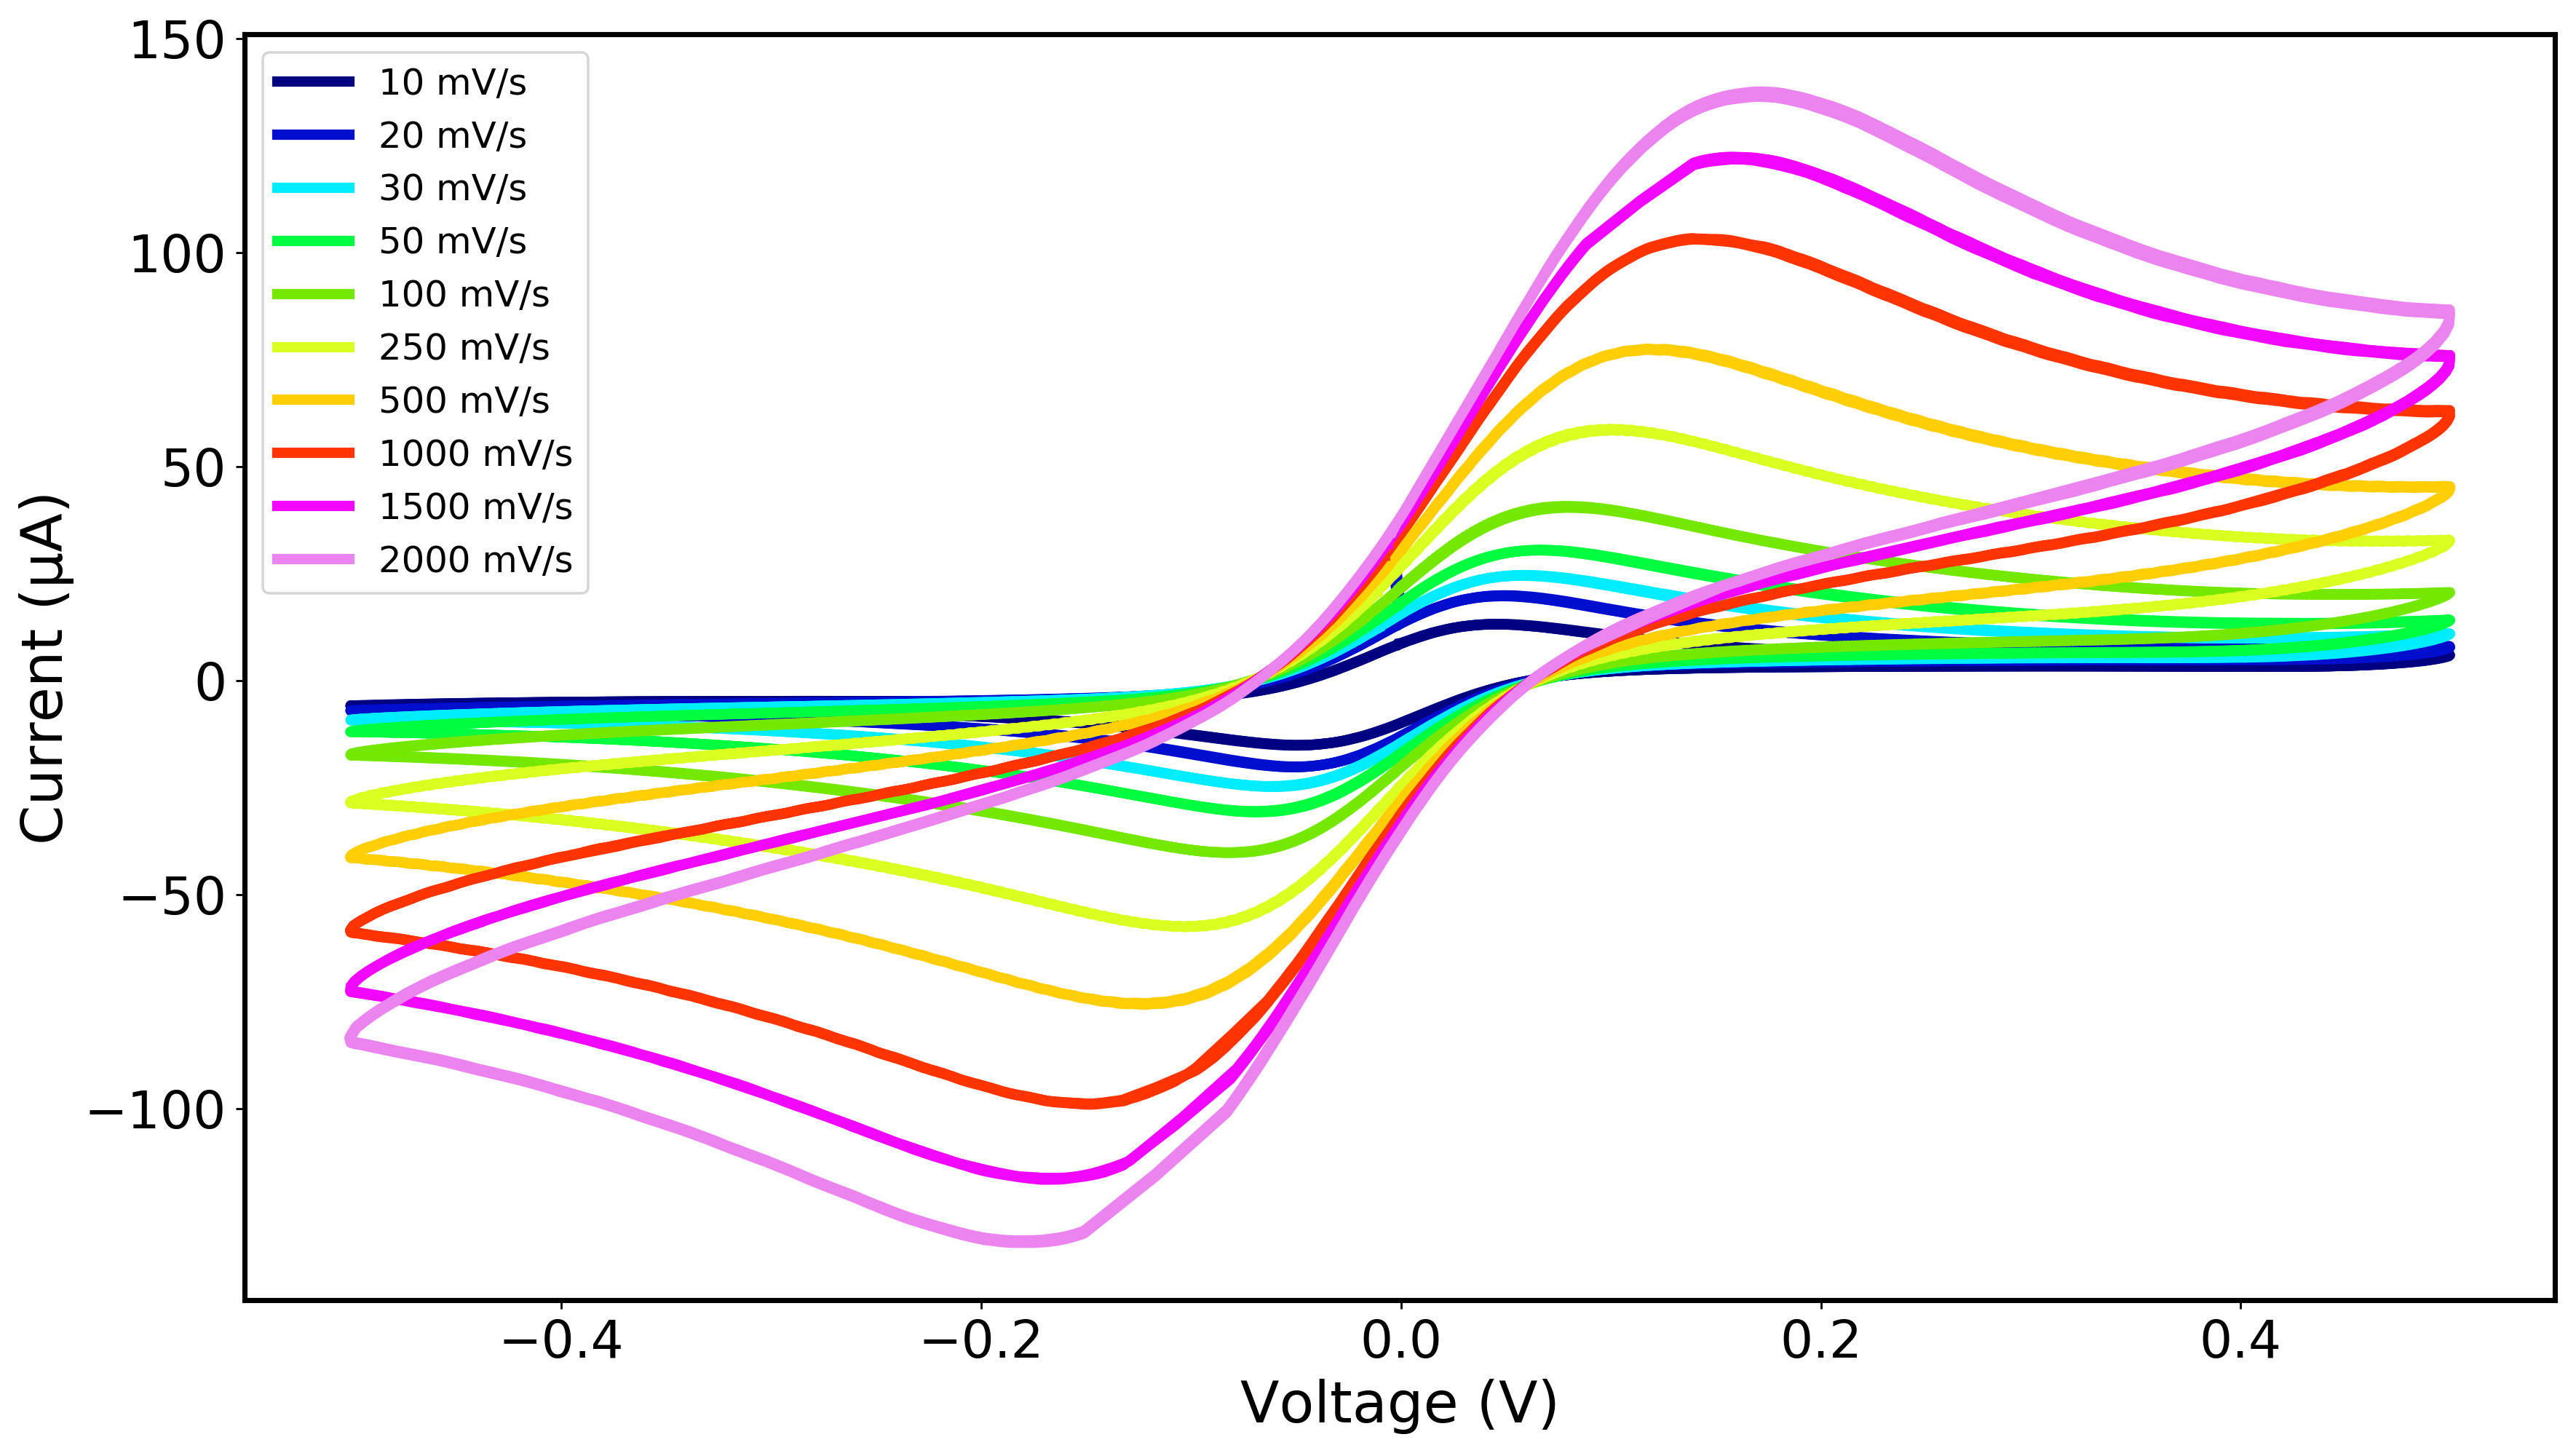

In [4]:
fig, ax = plt.subplots(figsize=(16,9), dpi=256)

scan_rate = [10, 20, 30, 50, 100, 250, 500, 1000, 1500, 2000]
c = 0.1

for i in range(0,59,2):
    c +=0.05
    if i%6 == 0:
        ax.plot(np.array(data.iloc[:, i]),
                np.array(data.iloc[:, i+1])*1000,
                linewidth = 4,
                label = f'{scan_rate[int(i/6)]} mV/s')
    else:
        ax.plot(np.array(data.iloc[:, i]),
                np.array(data.iloc[:, i+1])*1000,
                linewidth = 4)

colormap = plt.cm.gist_ncar  
colors = [colormap(i) for i in np.linspace(0, 1, len(ax.lines)/3+1)]  #change here
m = 0

for i,j in enumerate(ax.lines):
    count = i+3
    if count%3 == 0:
        j.set_color(colors[m])
        m += 1
    else:
        j.set_color(colors[m-1])
    
ax.legend(fontsize = 14)
plt.xlabel('Voltage (V)', fontsize = 22)
plt.ylabel('Current (µA)', fontsize = 22)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.spines["bottom"].set_linewidth(2)
ax.spines["top"].set_linewidth(2)
ax.spines["right"].set_linewidth(2)
ax.spines["left"].set_linewidth(2)

plt.savefig('CV_color.png', bbox_inches = 'tight')

plt.show()